| **Main Classes in Cellpose**       | **Description**                                                                 |
|------------------------------------|---------------------------------------------------------------------------------|
| `cellpose.models.Cellpose`         | Core class for running segmentation using a pretrained model.                   |
| `cellpose.models.CellposeModel`    | Allows using custom or pretrained models for segmentation.                      |
| `cellpose.io`                      | Handles loading and saving of images.                                           |
| `cellpose.plot`                    | Provides visualization utilities for segmentation results.                      |
| `cellpose.utils`                   | Contains helper functions (e.g., mask manipulation, cell counting).             |

In [25]:
import matplotlib.pyplot as plt
from cellpose import models, io
from tifffile import imread
import PIL
from PIL import Image
import numpy as np
import pathlib
import glob
import random
import os

In [32]:


current_path=pathlib.Path.cwd()/'datasets'/'images'

random_image=random.choice(os.listdir(current_path))
# image=Image.open()

# images_files=glob.glob(str(current_path / '*.[png]*'))

# PIL.Image(random.choice(images_files))


image = io.imread(os.path.join(current_path,random.choice(os.listdir(current_path))))

# Check the type and shape of the image
print(type(image))  # Should print: <class 'numpy.ndarray'>
print(image.shape)  # Prints the shape of the image (Height, Width, Channels)



<class 'numpy.ndarray'>
(512, 518, 3)


In [33]:
# load a model
model=models.Cellpose(model_type='cyto',gpu=True)
model

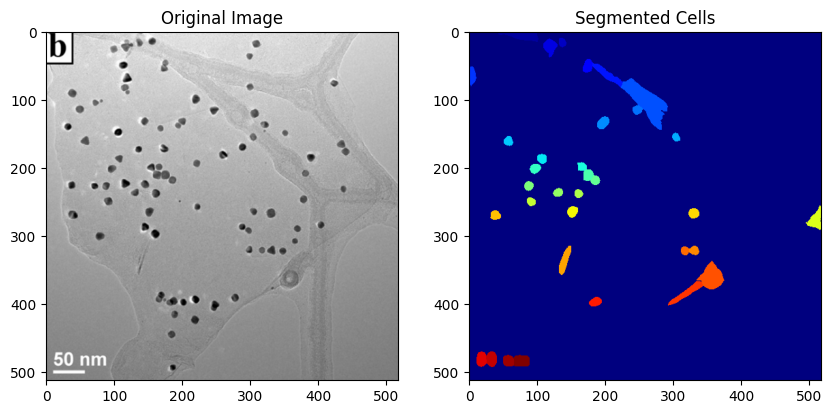

In [36]:
# run segmentation

masks, flows, styles, diams=model.eval(image, diameter=30, channels=[0,0])

# Display results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(masks, cmap='jet')
ax[1].set_title("Segmented Cells")
plt.show()

In [37]:
total_cells=np.unique(masks)
print(total_cells)   # 0 means background remaining number:  cell IDs (each number represents one segmented cell)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


(512, 518, 3)
(2, 512, 518)


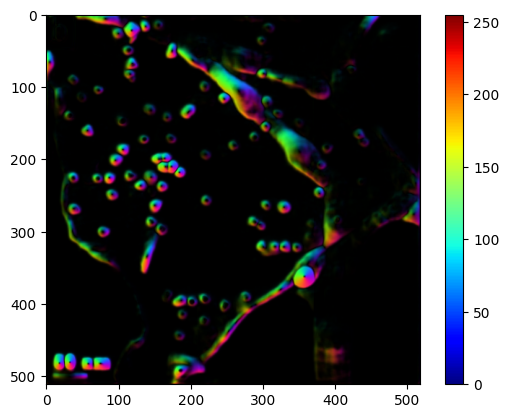

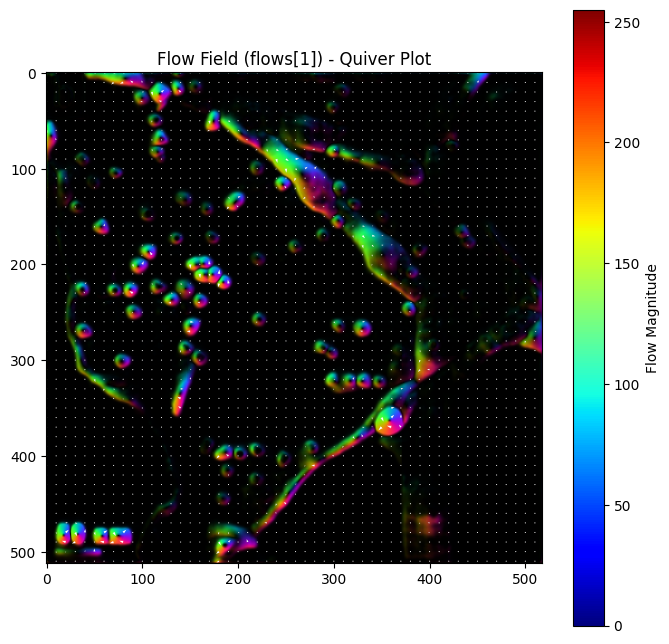

In [38]:
# flows - Segmentation Dynamics
# What it contains:
# A tuple of two arrays representing the segmentation's internal mechanics:

# flows[0]: Flow fields (2D vector field showing pixel movement directions)

# flows[1]: Cell probability (0-1 confidence map of where cells are likely to be)
#  print shape of flows[0]
print(flows[0].shape)
#  print shape of flows[1]
print(flows[1].shape)


plt.imshow(flows[0][:,:], cmap='jet')
plt.colorbar()
plt.show()


# flows[1] has a shape of (2, H, W), where:

# First channel (flows[1][0]): X-component of the flow field.

# Second channel (flows[1][1]): Y-component of the flow field.

# Extract X and Y flow components
flow_x = flows[1][0]  # X-direction flow
flow_y = flows[1][1]  # Y-direction flow

# Create a grid for vector field visualization
H, W = flow_x.shape
Y, X = np.mgrid[0:H, 0:W]

# Plot vector field using quiver
plt.figure(figsize=(8, 8))
plt.imshow(flows[0], cmap='jet')  # Background: segmentation mask
plt.colorbar(label="Flow Magnitude")
plt.quiver(X[::10, ::10], Y[::10, ::10], 
           flow_x[::10, ::10], flow_y[::10, ::10], 
           angles='xy', scale_units='xy', scale=1, color='w')

plt.title("Flow Field (flows[1]) - Quiver Plot")
plt.show()


In [42]:
# styles are often used internally by Cellpose for visualization purposes, such as distinguishing different regions or cells by different colors or attributes
print("Styles output:", styles)
styles.shape

Styles output: [-6.66761491e-03  4.16647084e-02 -9.36129913e-02  1.39549956e-01
  1.25454053e-01 -4.24682023e-03  2.64351554e-02  8.35444108e-02
 -1.88217774e-01  1.08269893e-01 -4.18765517e-03 -6.31866138e-03
 -1.44884273e-01 -1.00521050e-01  1.68784913e-02  1.53261181e-02
 -2.33616441e-01  1.08996227e-01  1.30477892e-02  5.04660979e-02
  3.77362110e-02 -8.61696340e-03  6.17671646e-02  6.60982281e-02
  1.79541428e-02 -6.13280870e-02  3.53477709e-02  1.41156554e-01
 -3.91595252e-02  4.58237082e-02 -3.92931364e-02  1.67287327e-02
 -3.16616148e-02  4.34539616e-02  2.67321672e-02  5.82399257e-02
 -4.94476072e-02  7.40114425e-04 -1.36461696e-02  3.81067619e-02
  4.89512607e-02  5.93121052e-02 -1.99584365e-02  1.83126852e-02
  2.50995578e-03 -3.36851925e-02 -1.00595551e-02  5.28207608e-02
 -8.23603868e-02 -1.32078063e-02  6.25680164e-02  9.41863284e-02
  1.89258270e-02 -1.01213960e-03  2.73623466e-02  5.39808981e-02
 -3.34759355e-02  1.28849581e-01 -2.59643011e-02  6.35475442e-02
  6.014868

(256,)